## Test agency historic budget data

In [2]:
pip install awswrangler

  Using cached awswrangler-3.8.0-py3-none-any.whl.metadata (17 kB)
Using cached awswrangler-3.8.0-py3-none-any.whl (380 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
!{sys.executable} -m pip install PyAthena

  Using cached pyathena-3.8.3-py3-none-any.whl.metadata (6.2 kB)
Using cached pyathena-3.8.3-py3-none-any.whl (75 kB)


In [4]:
import awswrangler as wr
import pandas as pd
import datetime as dt
from datetime import datetime
from pyathena import connect
import matplotlib.pyplot as plt
import seaborn as sns

## TIME PERIOD OF DATASET

### DFs generation

In [13]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
table_name = 'locations'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)

# trae la tabla entera, el tema está en pasar una query completa de sql, determinadas columnas en el select se las banca

/tmp/ipykernel_21/731752826.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)


In [14]:
df1

,vp
0,andres.fulgencio@viamericas.com
1,randy.ostler@viamericas.com
2,randy.ostler@viamericas.com
3,randy.ostler@viamericas.com
4,andres.fulgencio@viamericas.com
...,...
23284,hugo.ucelo@viamericas.com
23285,andres.fulgencio@viamericas.com
23286,hugo.ucelo@viamericas.com
23287,hugo.ucelo@viamericas.com


In [7]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
#origin_name = 'AwsDataCatalog'
#database_name = 'viamericas'
#table_name = 'locations'
#condition = '"FL0%"'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)

/tmp/ipykernel_17/3918688316.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)


In [8]:
df.head()

,fax,main_branches,days_last_visit,date_agreement,amount_last_week,vp,state_budget,date_is_viacheck,mom_mtd_performance_category,fin_closing_day,...,id_salesforce,type,last_month_hwm_performance,sales_representative,related_reason,mean_days_inactive,is_reopen,last_sync,payments_made,mtd_count_viatopups
0,,TS02(0),None,None,NaN,None,None,None,None,None,...,0013j00002zoF0NAAU,Not in budget,NaN,TEST AGENCIES,NaN,None,None,NaT,None,NaN
1,3055033110,"D551(0),F033(0)",None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0OAAU,Not in budget,NaN,VIALOCAL,NaN,None,None,NaT,None,NaN
2,3054776741,F005(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0PAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
3,9549795992,F003(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0QAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
4,3053862747,F004(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0RAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN


In [9]:
df.shape

(819, 196)

In [ ]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)

/tmp/ipykernel_17/1901365188.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)


In [ ]:
df.head()

,id_main_branch,balance,dso_pastdue,dso_deposit_day,day
0,F521,0.0000,NaN,NaN,2024-02-04
1,F033,0.0000,NaN,NaN,2024-02-04
2,F776,0.0000,NaN,NaN,2024-02-04
3,F520,0.0048,NaN,NaN,2024-02-04
4,F032,0.0000,NaN,NaN,2024-02-04


In [16]:
df521 = df[df['id_main_branch']== 'F520']

<Axes: >

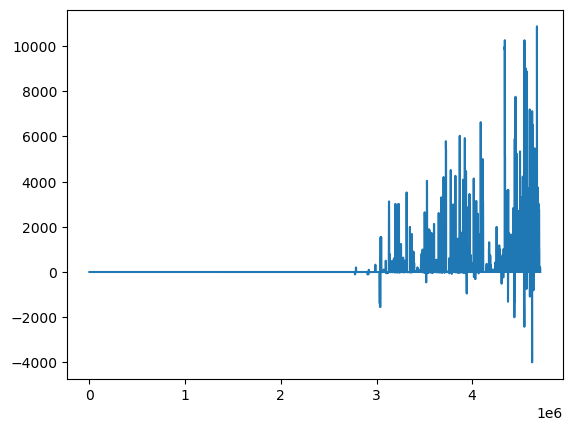

In [22]:
df521.balance.plot(x='day')

<Axes: >

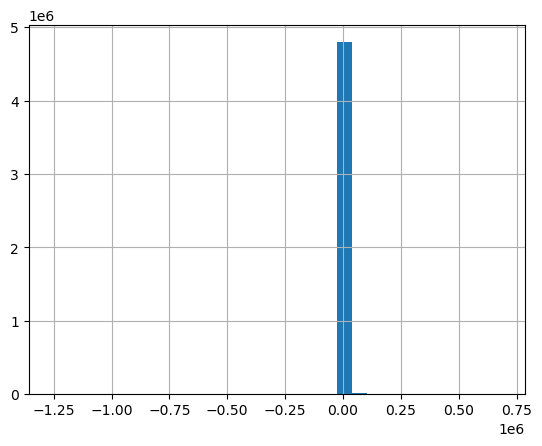

In [25]:
df['balance'].hist(bins=30)

<Axes: >

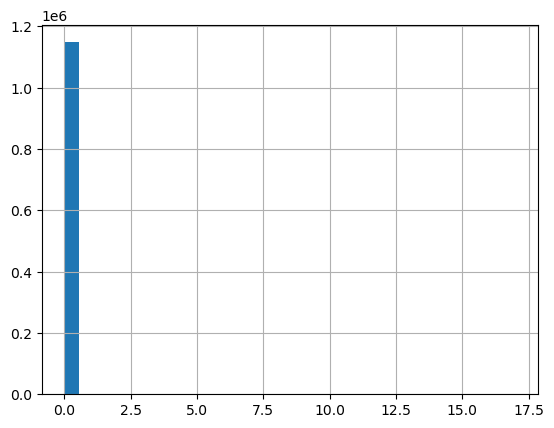

In [26]:
df['dso_pastdue'].hist(bins=30)

In [29]:
df['dso_deposit_day'].unique()

array([ nan,   0.,   1.,  15.,   4.,   2.,   3.,   6.,  24.,  23.,  22.,
         5.,  16.,  14.,   7.,   9.,   8., 235., 379., 374., 373., 372.,
       365., 304., 303., 302., 169., 163., 162., 155., 134., 120.,  78.,
        11.,  44.,  43.,  64.,  52.,  51.,  50.,  38.,  37.,  36.,  31.,
        30.,  29., 318., 317., 297., 296., 295., 277., 248., 247., 246.,
       213., 212., 211., 170.,  87.,  86.,  85.,  73.,  72.,  71.,  65.,
        59.,  58.,  57.])

In [30]:
df['id_main_branch'].unique()

array(['F521', 'F033', 'F776', 'F520', 'F032', 'F099', 'F519', 'F774',
       'F777', 'F518', 'F773', 'F778', 'F517', 'F030', 'F779', 'F516',
       'F029', 'F780', 'F515', 'F772', 'F781', 'F514', 'F771', 'F782',
       'F513', 'F028', 'F183', 'F512', 'F027', 'F184', 'F511', 'F026',
       'F185', 'F510', 'F770', 'F783', 'F509', 'F025', 'F784', 'F508',
       'F024', 'F785', 'F507', 'F023', 'F786', 'F506', 'F022', 'F787',
       'F505', 'F020', 'F788', 'F504', 'F769', 'F789', 'F503', 'F768',
       'F790', 'F502', 'F019', 'F186', 'F501', 'F767', 'F187', 'F500',
       'F766', 'F188', 'F499', 'F765', 'F189', 'F498', 'F764', 'F190',
       'F497', 'F763', 'F192', 'F496', 'F018', 'F193', 'F495', 'F017',
       'F791', 'F494', 'F762', 'F792', 'F493', 'F761', 'F198', 'F492',
       'F760', 'F793', 'F491', 'F758', 'F199', 'F490', 'F016', 'F200',
       'F489', 'F015', 'F794', 'F488', 'F014', 'F796', 'F487', 'F013',
       'F797', 'F486', 'F012', 'F798', 'F485', 'F756', 'F799', 'F484',
      

## Con los datos utilizados en el alarmado de KPR1

In [7]:
df = pd.read_csv('first_45_days_branch.csv')

In [9]:
df.describe()

,DAYS,COUNT,AMOUNT,GP
count,190779.000000,190779.000000,190779.000000,190779.000000
mean,22.399682,4.878163,2292.060546,13.967231
std,13.278708,10.570094,5548.596582,37.187106
min,0.000000,-10.000000,-10938.000000,-1717.310000
25%,11.000000,0.000000,0.000000,0.000000
50%,22.000000,1.000000,300.000000,2.250000
75%,34.000000,5.000000,2385.000000,13.900000
max,45.000000,439.000000,363209.000000,1820.510000


In [10]:
df.head()

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
0,A00009,FL2606,2023-11-08,0,Wed,0,0,0.0,Wed
1,A00009,FL2606,2023-11-09,1,Thu,0,0,0.0,Wed
2,A00009,FL2606,2023-11-10,2,Fri,0,0,0.0,Wed
3,A00009,FL2606,2023-11-11,3,Sat,0,0,0.0,Wed
4,A00009,FL2606,2023-11-12,4,Sun,0,0,0.0,Wed


In [12]:
df['ID_LOCATION'].nunique()

4314

In [14]:
df.shape

(190779, 9)

In [15]:
df['FIRST_DAY'].unique()

array(['Wed', nan, 'Fri', 'Thu', 'Mon', 'Tue', 'Sat', 'Sun'], dtype=object)

In [18]:
df_location = df.groupby('FIRST_DAY')['ID_LOCATION'].nunique()
df_location = pd.DataFrame(df_location)

In [19]:
df_location

,ID_LOCATION
FIRST_DAY,
Fri,831
Mon,625
Sat,327
Sun,1
Thu,865
Tue,755
Wed,794


In [20]:
df_location['mean_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].mean()
df_location

,ID_LOCATION,mean_amount
FIRST_DAY,,
Fri,831,2369.433521
Mon,625,2037.936813
Sat,327,2183.001973
Sun,1,4525.369565
Thu,865,2337.517352
Tue,755,2597.205278
Wed,794,2086.788739


In [21]:
df_location['mean_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].mean()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt
FIRST_DAY,,,
Fri,831,2369.433521,4.996737
Mon,625,2037.936813,4.322117
Sat,327,2183.001973,4.605469
Sun,1,4525.369565,11.565217
Thu,865,2337.517352,4.954764
Tue,755,2597.205278,5.621137
Wed,794,2086.788739,4.462548


In [22]:
df_location['max_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt
FIRST_DAY,,,,
Fri,831,2369.433521,4.996737,439
Mon,625,2037.936813,4.322117,118
Sat,327,2183.001973,4.605469,144
Sun,1,4525.369565,11.565217,33
Thu,865,2337.517352,4.954764,265
Tue,755,2597.205278,5.621137,429
Wed,794,2086.788739,4.462548,151


In [23]:
df_location['max_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt,max_amount
FIRST_DAY,,,,,
Fri,831,2369.433521,4.996737,439,352927
Mon,625,2037.936813,4.322117,118,81317
Sat,327,2183.001973,4.605469,144,74359
Sun,1,4525.369565,11.565217,33,15305
Thu,865,2337.517352,4.954764,265,149229
Tue,755,2597.205278,5.621137,429,363209
Wed,794,2086.788739,4.462548,151,87870


In [24]:
df.nlargest(10, 'AMOUNT')

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
62908,A23207,CA4232,2022-10-15,25,Sat,429,363209,-40.98,Tue
94207,A23916,FL2272,2023-03-26,44,Sun,439,352927,163.45,Fri
62894,A23207,CA4232,2022-10-01,11,Sat,250,263006,2.20,Tue
62922,A23207,CA4232,2022-10-29,39,Sat,366,241471,-658.60,Tue
94206,A23916,FL2272,2023-03-25,43,Sat,305,214366,357.69,Fri
52434,A22961,MS0182,2022-09-10,39,Sat,390,191005,1099.47,Tue
94200,A23916,FL2272,2023-03-19,37,Sun,241,188221,934.12,Fri
94199,A23916,FL2272,2023-03-18,36,Sat,266,171375,1114.71,Fri
180788,A25863,NY1559,2024-01-08,25,Mon,115,149229,331.50,Thu
3718,A21763,AZ0157,2021-12-10,41,Fri,242,140899,398.60,NaN


# correlaciones?

In [ ]:
# Traer data de trx y montos

In [ ]:
#CREATE TABLE analytics.daily_check AS
SELECT
   CAST(RTRIM(p.id_main_branch_sent) AS VARCHAR(60)) AS AGENCY,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-11-30 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(p.id_main_branch_sent),
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE)

In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT
   CAST(RTRIM(b.ID_LOCATION) AS VARCHAR(60)) AS AGENCY,
   a.ID_BRANCH as ID_BRANCH,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT,
   c.BALANCE as BALANCE
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
  LEFT JOIN AwsDataCatalog.viamericas.history_balance c ON c.id_main_branch = b.id_main_branch and c.date_balance = cast(a.DATE_RECEIVER as DATE)
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-01-01 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(b.ID_LOCATION),
   c.BALANCE, 
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE); ''', conn)

/tmp/ipykernel_18/809876169.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT


In [6]:
df

,AGENCY,DATE,TX,AMOUNT,BALANCE
0,OK0176,2024-01-16,4,863.0,14247.7242
1,CO0410,2023-03-20,3,750.0,5679.0004
2,CA3657,2023-07-04,5,940.0,5325.9994
3,FL1704,2023-02-04,9,4156.0,-53351.3701
4,DE0119,2023-05-14,53,28256.0,-198115.5800
...,...,...,...,...,...
1650095,CA4382,2023-09-07,4,3890.0,1970.0047
1650096,IL0785,2023-02-07,2,750.0,914.0006
1650097,PA0268,2023-10-30,42,36405.0,286.4914
1650098,WA0311,2023-11-03,8,4752.0,4358.8266


In [7]:
df.describe()

,TX,AMOUNT,BALANCE
count,1.650100e+06,1.650100e+06,1.649804e+06
mean,1.708824e+01,7.842763e+03,8.888206e+03
std,2.424096e+01,1.246419e+04,5.674177e+04
min,0.000000e+00,0.000000e+00,-2.853621e+07
25%,3.000000e+00,1.265000e+03,1.020159e+03
50%,9.000000e+00,3.785000e+03,5.176996e+03
75%,2.100000e+01,9.477000e+03,1.493354e+04
max,8.380000e+02,6.079065e+05,2.365007e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650100 entries, 0 to 1650099
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   AGENCY   1650100 non-null  object 
 1   DATE     1650100 non-null  object 
 2   TX       1650100 non-null  int64  
 3   AMOUNT   1650100 non-null  float64
 4   BALANCE  1649804 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 62.9+ MB


In [18]:
35932/69159 #casi 50% sin hsitory_balance sumando otro mes da el mismo % de missing, toamndo más historial desde enero 2023 sube a 51% con 153550 casi 100% datos menos meses

0.5195563845631082

In [9]:
df.to_csv('2023_trx_balance_history2.csv', index = False)

## Control charts

In [ ]:
import matplotlib.pyplot as plt
from ControlCharts import ShewhartControlModel

In [ ]:
# Group data by day and take the average of the Squared Error
grouped_data= data[['Day', 'Squared Error']].groupby(by='Day').mean()
grouped_data_std= data[['Day', 'Squared Error']].groupby(by='Day').std()
# Train-Test Split
x_train= grouped_data.iloc[:25, :].values.reshape((25,))
x_test= grouped_data.iloc[25:, :].values.reshape((25,))

In [ ]:
# Estimate standard deviation
qcc= pd.read_csv('BiasControlConstants/quality_control_constants.csv')
n= 20 # varia según el número de días que una agencia estuvo activa...
c4= qcc['c4'].loc[n-2]
sigma_train=np.average(grouped_data_std.values[:25])/(np.sqrt(n)*c4)

In [ ]:
# Build Shewhart Control Model
spc_model= ShewhartControlModel(k=3)
ucl, lcl= spc_model.fit(x_train, sigma= sigma_train)
ooc= spc_model.predict(x_test)
testing_plot=spc_model.plot(x=x_test, dpi= 100)
# Plot all data
complete_plot= spc_model.plot(x=grouped_data.values, dpi= 100)
train_plot= spc_model.plot(x=x_train, dpi= 100)

In [37]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)

/tmp/ipykernel_21/2057683596.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)


In [38]:
df1

,id


## Probando la vieja forma de default

In [16]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''WITH Payment_Agreeement as(
	SELECT
			DISTINCT
			REPLACE(RTRIM(b.ID_BRANCH),'C','A') AS ID_BRANCH
			,g.DATE_CREA_MAIN_BRANCH AS DATE_START
			,g.DEBITO_GROUP AS NEGOTIATED
			,g.CREDITO_GROUP AS PAID
			,g.BALANCE_GROUP AS BALANCE
	FROM	 viamericas.GROUP_BRANCH g INNER JOIN
			 viamericas.BRANCH b ON g.ID_MAIN_BRANCH = b.ID_MAIN_BRANCH
	WHERE	g.DEBITO_GROUP IS NOT NULL
			AND b.ID_LOCATION IS NOT NULL
			AND b.ID_BRANCH LIKE 'C%'
			AND g.DATE_CREA_MAIN_BRANCH < TIMESTAMP '2024-01-01'
)
SELECT  
		a.DATE_AUDIT
        , b.ID_LOCATION
		, a.ID_BRANCH
		, b.ID_MAIN_BRANCH
		, a.new_status
		, a. LAST_INACTIVATION_TYPE
		, CASE WHEN coalesce(g.BALANCE_GROUP, 0) < 0 THEN 0 ELSE coalesce(g.BALANCE_GROUP, 0) END AS CURRENT_BALANCE -- sI NEGATIVO, PONER CERO
		, p.DATE_START AS AGREEMENT_START_DATE
		, coalesce(p.BALANCE, 0) AS AGREEMENT_BALANCE
		, coalesce(p.NEGOTIATED, 0) AS AGREEMENT_INITIAL_AMOUNT
		, coalesce(p.PAID, 0) AS AGREEMENT_PAID
FROM	  viamericas . AUDIT_BRANCH_STATUS  a INNER JOIN
		 viamericas.BRANCH AS b  ON a.ID_BRANCH = b.ID_BRANCH INNER JOIN
		 viamericas .GROUP_BRANCH g ON b.ID_MAIN_BRANCH = g.ID_MAIN_BRANCH LEFT JOIN
		Payment_Agreeement p ON b.ID_BRANCH = p.ID_BRANCH
WHERE	 DATE_AUDIT  >= TIMESTAMP'2016-01-01'
		AND  DATE_AUDIT  < TIMESTAMP'2024-01-01'
		AND a.LAST_INACTIVATION_TYPE = 1
		AND a.OLD_FLAG = 'A'
		AND a. NEW_FLAG  = 'I'
		AND date_diff('day',a.DATE_AUDIT,TIMESTAMP'2024-01-01') > 5
		AND (RTRIM(b.ID_BRANCH) LIKE 'A%')
		AND b.ID_TYPE_BRANCH = 'R'
		AND NOT EXISTS( --no se volvio a re activar despueda de la inactivacion
			SELECT	'1'
			FROM	  viamericas . AUDIT_BRANCH_STATUS  b
			WHERE	b.OLD_FLAG = 'I'
					AND b. NEW_FLAG  = 'A'
					AND b.ID_BRANCH = a.ID_BRANCH
					AND b. DATE_AUDIT  > a. DATE_AUDIT 
		)
		AND NOT EXISTS( -- QUE NO ESTA ACTIVA HOY DIA
			SELECT '1' FROM viamericas.BRANCH WHERE  id_flag_branch = 'A' AND ID_MAIN_BRANCH = b.ID_MAIN_BRANCH
		) ''', conn)

/tmp/ipykernel_18/3093054830.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''WITH Payment_Agreeement as(


In [27]:
df.head()

,DATE_AUDIT,ID_LOCATION,ID_BRANCH,ID_MAIN_BRANCH,new_status,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID,default
0,2018-07-05 14:18:14.967,GA0675,A07049,G654,O,1,0.0,NaT,0.0,0.00,0.00,1
1,2022-07-15 16:00:04.883,NJ1015,A22401,471E,O,1,0.0,2022-07-07 15:01:01.510,0.0,4153.43,4153.43,1
2,2018-10-12 09:31:50.487,UT0176,A17272,277Z,O,1,0.0,NaT,0.0,0.00,0.00,1
3,2017-06-29 12:09:19.533,AZ0045,A14703,197A,O,1,0.0,NaT,0.0,0.00,0.00,1
4,2019-02-15 16:40:55.150,NC1031,A12558,131J,O,1,0.0,NaT,0.0,0.00,0.00,1


In [18]:
df.describe()

,DATE_AUDIT,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID
count,1887,1887.0,1887.000000,138,1887.000000,1887.000000,1887.000000
mean,2019-03-25 20:32:00.050475520,1.0,295.796926,2018-06-07 12:28:24.449007360,36.346153,1917.677689,1881.331537
min,2016-01-04 17:23:27.843000,1.0,0.000000,2009-05-20 18:03:09.317000,-500.000000,0.000000,0.000000
25%,2017-03-25 04:08:50.121499904,1.0,0.000000,2015-11-08 13:24:41.949500160,0.000000,0.000000,0.000000
50%,2018-07-19 17:26:49.409999872,1.0,0.000000,2019-03-20 06:22:40.944999936,0.000000,0.000000,0.000000
75%,2021-01-09 18:58:19.404999936,1.0,0.000000,2020-07-06 16:18:25.210749952,0.000000,0.000000,0.000000
max,2023-12-22 16:00:10.110000,1.0,57674.412100,2023-10-27 19:01:44.870000,46941.540000,229665.200000,229665.200000
std,NaN,0.0,2860.101252,NaN,1138.336824,12389.411695,12303.910983


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE_AUDIT                1887 non-null   datetime64[ns]
 1   ID_LOCATION               1887 non-null   object        
 2   ID_BRANCH                 1887 non-null   object        
 3   ID_MAIN_BRANCH            1887 non-null   object        
 4   new_status                1887 non-null   object        
 5   LAST_INACTIVATION_TYPE    1887 non-null   int64         
 6   CURRENT_BALANCE           1887 non-null   float64       
 7   AGREEMENT_START_DATE      138 non-null    datetime64[ns]
 8   AGREEMENT_BALANCE         1887 non-null   float64       
 9   AGREEMENT_INITIAL_AMOUNT  1887 non-null   float64       
 10  AGREEMENT_PAID            1887 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 162.3+ KB


<Axes: >

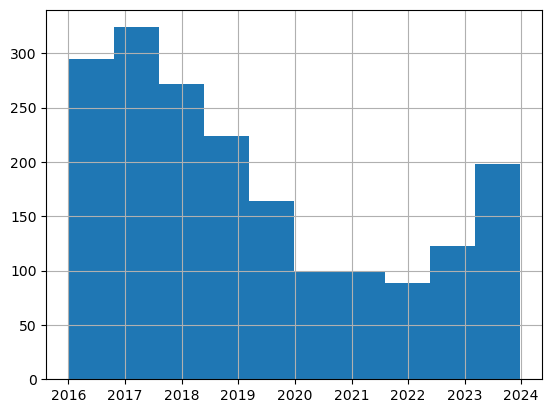

In [20]:
df['DATE_AUDIT'].hist()

<Axes: >

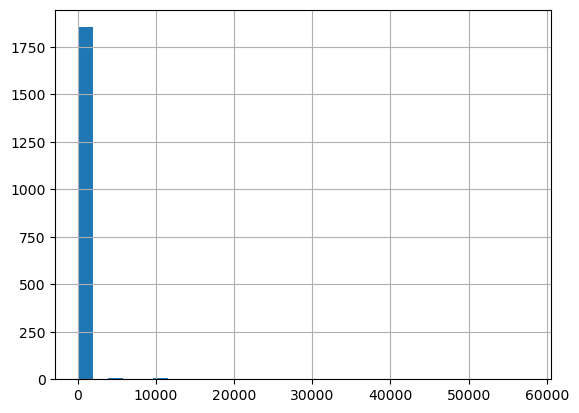

In [21]:
df['CURRENT_BALANCE'].hist(bins=30)

In [22]:
dfbal = df[df['CURRENT_BALANCE'] >100]

<Axes: >

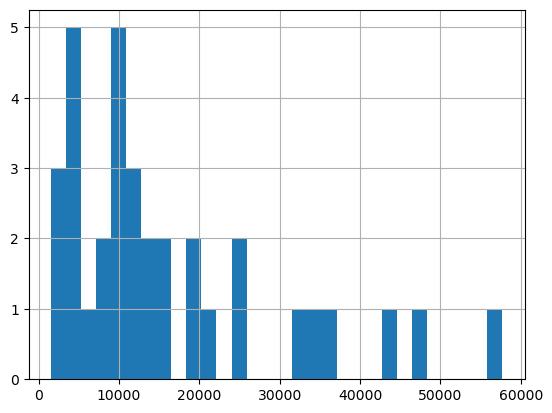

In [23]:
dfbal['CURRENT_BALANCE'].hist(bins=30)

In [26]:
df['default'] = 1

## Cruce con el hsitory balance

In [24]:
df2 = pd.read_csv('2023_trx_balance_history2.csv')

In [31]:
df2.shape

(1650100, 5)

In [33]:
df2.merge(df,how='left', left_on='AGENCY', right_on='ID_LOCATION')
# nos es la mejor forma tiene que ser x id_location y fecha aunquie no exacta...

,AGENCY,DATE,TX,AMOUNT,BALANCE,DATE_AUDIT,ID_LOCATION,ID_BRANCH,ID_MAIN_BRANCH,new_status,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID,default
0,OK0176,2024-01-16,4,863.0,14247.7242,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,CO0410,2023-03-20,3,750.0,5679.0004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,CA3657,2023-07-04,5,940.0,5325.9994,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,FL1704,2023-02-04,9,4156.0,-53351.3701,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,DE0119,2023-05-14,53,28256.0,-198115.5800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650658,CA4382,2023-09-07,4,3890.0,1970.0047,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650659,IL0785,2023-02-07,2,750.0,914.0006,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650660,PA0268,2023-10-30,42,36405.0,286.4914,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650661,WA0311,2023-11-03,8,4752.0,4358.8266,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## Nueva forma de default pastdue>=15 días

In [5]:
default = pd.read_excel('Defaulted Agencies.xlsx')

In [11]:
default.columns

Index(['INACTIVATION_DATE', 'ID_BRANCH', 'CURRENT_EXTENDED_STATUS',
       'AGREEMENT_START_DATE', 'AGREEMENT_DAYS', 'AGREEMENT_BALANCE',
       'AGREEMENT_INITIAL_AMOUNT', 'AGREEMENT_PAID', 'OLD_STATUS', 'OLD_FLAG',
       'OLD_COMMENT', 'NEW_STATUS', 'NEW_FLAG', 'NEW_COMMENT',
       'LAST_INACTIVATION_TYPE', 'DESC_LAST_INACTIVATION_TYPE',
       'ACTIVATION_DATE', 'INACTIVE_DAYS'],
      dtype='object')

In [24]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26590 entries, 0 to 26589
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   INACTIVATION_DATE            26590 non-null  datetime64[ns]
 1   ID_BRANCH                    26590 non-null  object        
 2   CURRENT_EXTENDED_STATUS      26590 non-null  object        
 3   AGREEMENT_START_DATE         1416 non-null   datetime64[ns]
 4   AGREEMENT_DAYS               1416 non-null   float64       
 5   AGREEMENT_BALANCE            26590 non-null  float64       
 6   AGREEMENT_INITIAL_AMOUNT     26590 non-null  float64       
 7   AGREEMENT_PAID               26590 non-null  float64       
 8   OLD_STATUS                   26590 non-null  object        
 9   OLD_FLAG                     26590 non-null  object        
 10  OLD_COMMENT                  24717 non-null  object        
 11  NEW_STATUS                   26590 non-nu

<Axes: >

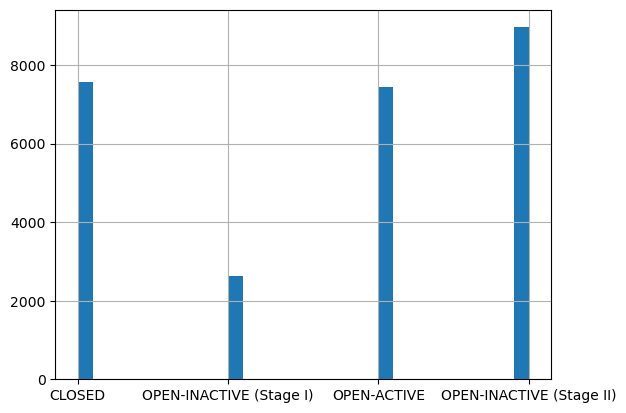

In [12]:
default['CURRENT_EXTENDED_STATUS'].hist(bins=30)

<Axes: >

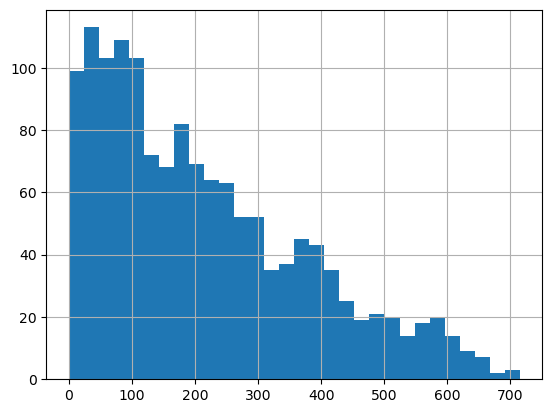

In [13]:
default['AGREEMENT_DAYS'].hist(bins=30)

<Axes: >

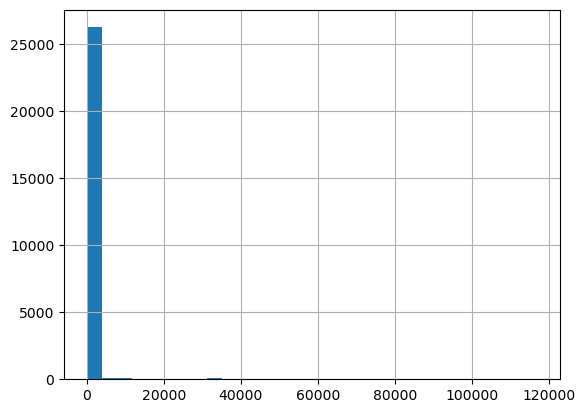

In [14]:
default['AGREEMENT_BALANCE'].hist(bins=30)

In [17]:
default['NEW_COMMENT'].unique()

array([nan, 'REACTIVACION AUTOMATICA PAST DUE',
       'PASTDUE/BALANCE VENCIDO INACTIVACION AUTOMATICA',
       'LOW PRODUCTION', 'REACTIVACIÓN DESDE DEPÓSITO',
       'Reactivación desde depósito', 'X APLICACIONES',
       'CHANGE OF OWNER. NEW A25319', 'FRAUD',
       'NO ACTIVAR - SSG & RICARDO', 'VIAGRICOLA -- ASK APPLICATIONS',
       'NO ESTAN TRABAJANCO CON LA PC', 'CIERRE DEL NEGOCIO',
       'UNUSUAL DEPOSITS', 'SEGUIRA TRABAJANDO, SE ACTIVA', 'LAST CHANCE',
       'J.CASTANEDA APPROVE REACTIVACTION', 'POTENTIAL FRAUD',
       'CODIGO CREADO POR ERROR'], dtype=object)

In [25]:
 default['AGREEMENT_BALANCE'].unique()

array([     0.  ,  21542.03,   3573.61,    350.  ,  62561.42,   6246.4 ,
         3786.26,    398.66,   1000.  ,  54603.58,  10937.99,   3438.46,
       117041.26,   6120.72,  34515.39,  28355.92,  86682.47,   5050.54,
        17567.29,   4000.  ,  11872.71,  12679.06,   4520.1 ,   6180.66])

<Axes: >

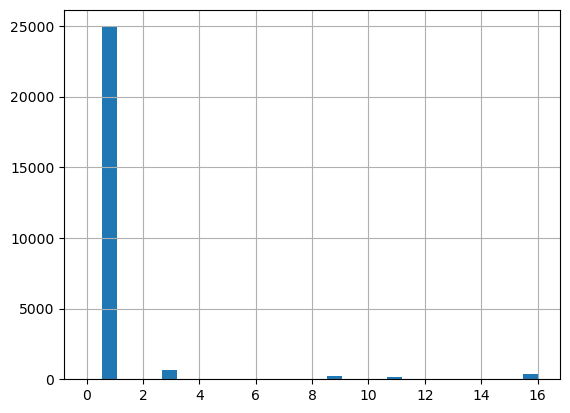

In [19]:
default['LAST_INACTIVATION_TYPE'].hist(bins=30)

<Axes: >

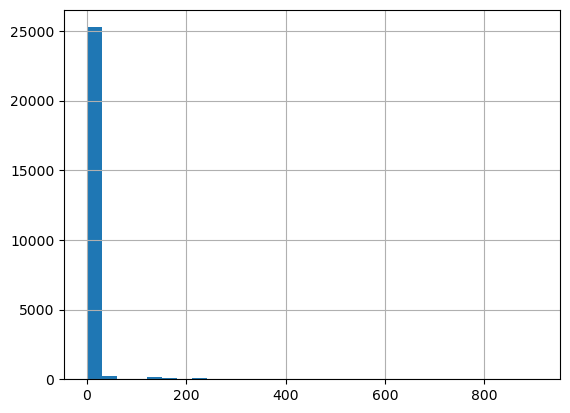

In [20]:
default['INACTIVE_DAYS'].hist(bins=30)

In [6]:
default2 = default[default['INACTIVE_DAYS'] < 16]

<Axes: >

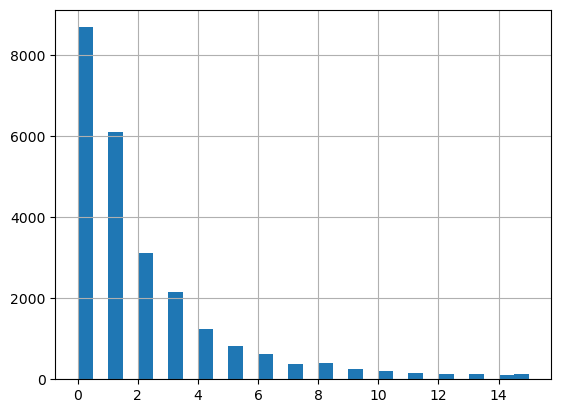

In [7]:
default2['INACTIVE_DAYS'].hist(bins=30)

In [12]:
default3 = default2[default2['INACTIVE_DAYS'] > 7]

<Axes: >

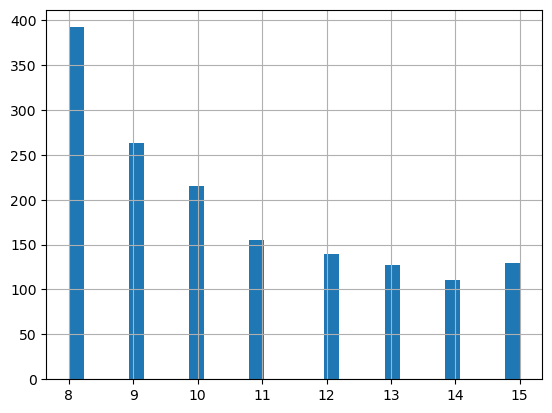

In [13]:
default3['INACTIVE_DAYS'].hist(bins=30)

In [17]:
default['days_to_agree'] = (default['INACTIVATION_DATE'] - default['AGREEMENT_START_DATE']).dt.days

<Axes: >

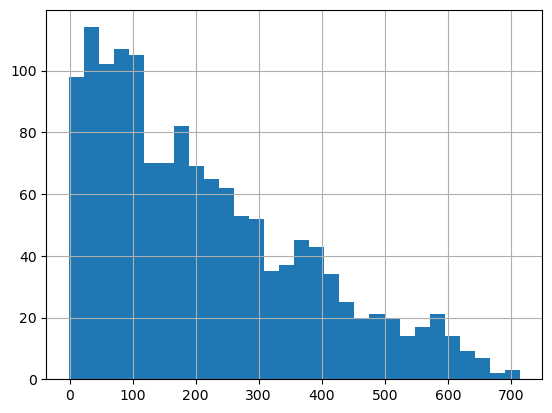

In [18]:
default['days_to_agree'].hist(bins=30)

### Repetir pero sólo con el historial deudor de las que efectivamente cerraron

In [19]:
closed = default[default['CURRENT_EXTENDED_STATUS'] == 'CLOSED']

In [20]:
closed2 = closed[closed['INACTIVE_DAYS'] < 16]

<Axes: >

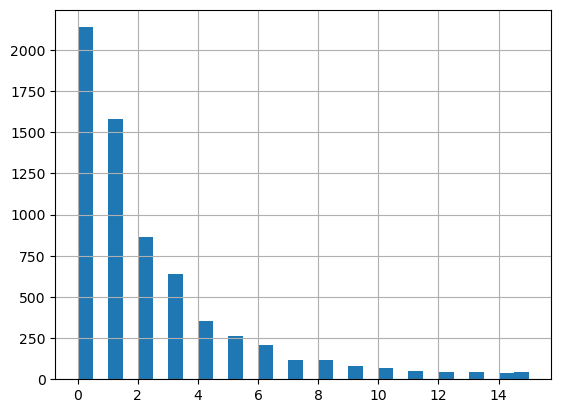

In [21]:
closed2['INACTIVE_DAYS'].hist(bins=30)

In [22]:
closed3 = closed2[closed2['INACTIVE_DAYS'] > 7]

<Axes: >

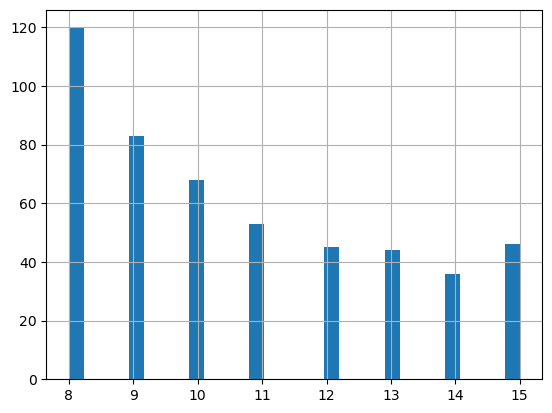

In [23]:
closed3['INACTIVE_DAYS'].hist(bins=30)

## Probando y comparando con las open

In [29]:
opened = default[default['CURRENT_EXTENDED_STATUS'] != 'CLOSED']

In [30]:
opened2 = opened[opened['INACTIVE_DAYS'] < 16]

<Axes: >

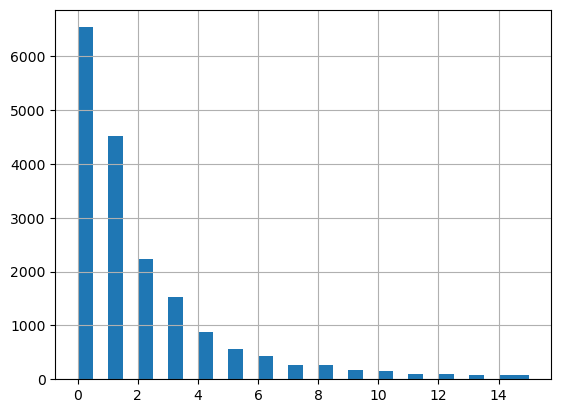

In [32]:
opened2['INACTIVE_DAYS'].hist(bins=30)

/tmp/ipykernel_18/1545340060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed2['INACTIVE_DAYS_C'] = closed2['INACTIVE_DAYS']
/tmp/ipykernel_18/1545340060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opened2['INACTIVE_DAYS_O'] = opened2['INACTIVE_DAYS']


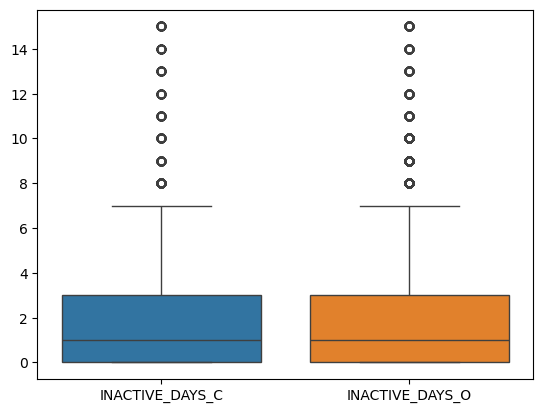

In [35]:

# Create two sample dataframes
closed2['INACTIVE_DAYS_C'] = closed2['INACTIVE_DAYS']
opened2['INACTIVE_DAYS_O'] = opened2['INACTIVE_DAYS']


# Combine the two dataframes into a single dataframe
df = pd.concat([closed2, opened2], axis=1)

#retain only the two columns of interest
lista = ['INACTIVE_DAYS_C', 'INACTIVE_DAYS_O']

df = df[lista]

# Create a boxplot with two columns
sns.boxplot(data=df)

# Add labels to the x-axis
plt.xticks([0, 1], ['INACTIVE_DAYS_C', 'INACTIVE_DAYS_O'])

# Show the plot
plt.show()

In [ ]:
# traer datos útiles, fecha default y agencia
INACTIVATION_DATE', 'ID_BRANCH'

In [21]:
lista =['INACTIVATION_DATE', 'ID_BRANCH']
ag_def = default[lista]

In [23]:
ag_def['default'] = 1

/tmp/ipykernel_21/1140376000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag_def['default'] = 1


In [24]:
ag_def

,INACTIVATION_DATE,ID_BRANCH,default
0,2022-10-28 12:25:56.080,A00216,1
1,2023-06-26 13:38:50.233,A00216,1
2,2022-01-03 21:33:23.410,A00219,1
3,2022-01-19 21:40:46.930,A00219,1
4,2022-02-02 20:20:44.217,A00219,1
...,...,...,...
26585,2023-05-17 17:44:49.360,AB0110,1
26586,2023-09-27 17:00:45.077,AB0110,1
26587,2023-10-14 16:13:33.273,AB0110,1
26588,2024-01-03 16:29:02.710,AB0110,1


df2 = pd.read_csv('2023_trx_balance_history2.csv') # le falta id_branch y las transacciones con cheques

In [28]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df2 = pd.read_sql('''with viacheck as(
SELECT
    DATE_FORMAT(ct.CheckDate, '%Y-%m-%d') AS DATE,
    COUNT(DISTINCT ct.checkID) AS TX_check,
    SUM(ct.AMOUNT) AS TOTAL_AMOUNT_check,
    b.id_location
FROM
    AwsDataCatalog.viamericas.checkTable ct
LEFT JOIN
    AwsDataCatalog.viamericas.BRANCH a ON a.id_branch = ct.CheckBranch
LEFT JOIN
    AwsDataCatalog.viamericas.location b ON a.id_location = b.id_location
       
WHERE
   NOT (a.id_branch LIKE 'T%')
   AND a.id_flag_branch = 'A'
   AND DATE_FORMAT(ct.CheckDate, '%Y-%m') between '2023-01' and '2024-02'
   AND  NOT b.id_location = 'NULL'
GROUP BY
    DATE_FORMAT(ct.CheckDate, '%Y-%m-%d'),
    b.id_location
    --b.name_location;
)
SELECT
   CAST(RTRIM(b.ID_LOCATION) AS VARCHAR(60)) AS AGENCY,
   a.ID_BRANCH as ID_BRANCH,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT,
   c.BALANCE as BALANCE,
   coalesce(d.TX_check, 0) as TX_check,
   coalesce(d.TOTAL_AMOUNT_check, 0) as TOTAL_AMOUNT_check
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
   LEFT JOIN AwsDataCatalog.viamericas.history_balance c ON c.id_main_branch = b.id_main_branch and c.date_balance = cast(a.DATE_RECEIVER as DATE)
   LEFT JOIN viacheck d ON d.id_location = b.ID_LOCATION and cast(d.DATE as DATE) = cast(a.DATE_RECEIVER as DATE)
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-01-01 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(b.ID_LOCATION),
   a.ID_BRANCH,
   c.BALANCE, 
   d.TX_check,
   d.TOTAL_AMOUNT_check,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE); ''', conn)

/tmp/ipykernel_21/579190763.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql('''with viacheck as(


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659233 entries, 0 to 1659232
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   AGENCY              1659233 non-null  object 
 1   ID_BRANCH           1659233 non-null  object 
 2   DATE                1659233 non-null  object 
 3   TX                  1659233 non-null  int64  
 4   AMOUNT              1659233 non-null  float64
 5   BALANCE             1658937 non-null  float64
 6   TX_check            1659233 non-null  int64  
 7   TOTAL_AMOUNT_check  1659233 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 101.3+ MB


In [33]:
default['DATE'] = default['INACTIVATION_DATE']

In [34]:
default['DATE'] #trim la hora para que sea cruzable

0       2022-10-28 12:25:56.080
1       2023-06-26 13:38:50.233
2       2022-01-03 21:33:23.410
3       2022-01-19 21:40:46.930
4       2022-02-02 20:20:44.217
                  ...          
26585   2023-05-17 17:44:49.360
26586   2023-09-27 17:00:45.077
26587   2023-10-14 16:13:33.273
26588   2024-01-03 16:29:02.710
26589   2024-01-08 16:13:00.777
Name: DATE, Length: 26590, dtype: datetime64[ns]

## Unir con data anterior 

In [5]:
df1 = pd.read_csv('2023_trx_balance_check_history3.csv')

In [6]:
df1.head()

,AGENCY,ID_BRANCH,DATE,TX,AMOUNT,BALANCE,TX_check,TOTAL_AMOUNT_check
0,TX1227,A22569,2023-08-13,17,10456.0,17741.8308,0,0.00
1,MD0948,A21038,2023-01-07,15,5939.0,-40677.1548,72,45021.39
2,FL1949,A19390,2023-10-03,1,2841.0,-38.4020,0,0.00
3,NJ0685,A15258,2023-08-28,8,2580.0,5474.4995,0,0.00
4,CA4183,A22917,2023-04-04,14,4806.0,-24382.5306,4,12354.42


In [7]:
df2 = pd.read_excel('Defaulted Agencies.xlsx')

In [10]:
#cambiar la fecha INACTIVATION_DATE a formato y-m-d y su nombre a DATE, filtrar sólo los inactive days mayores a 15 y llamarlos default
df2['DATE'] = df2['INACTIVATION_DATE'].dt.date

In [12]:
df3 = df2[df2['INACTIVE_DAYS'] > 14]

In [14]:
df3['DEFAULT'] = 1

/tmp/ipykernel_18/3250838113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DEFAULT'] = 1


In [16]:
lista =['DATE', 'ID_BRANCH', 'DEFAULT']
df3 = df3[lista]

In [28]:
df3.shape

(2062, 3)

In [20]:
merged_df = pd.merge(df1, df3, on=['DATE', 'ID_BRANCH'], how='outer')
# efectivamente los sucesos de default ocurren en fechas que no registran actividad alguna en las agencias

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661295 entries, 0 to 1661294
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   AGENCY              1659233 non-null  object 
 1   ID_BRANCH           1661295 non-null  object 
 2   DATE                1661295 non-null  object 
 3   TX                  1659233 non-null  float64
 4   AMOUNT              1659233 non-null  float64
 5   BALANCE             1658937 non-null  float64
 6   TX_check            1659233 non-null  float64
 7   TOTAL_AMOUNT_check  1659233 non-null  float64
 8   DEFAULT             2062 non-null     float64
dtypes: float64(6), object(3)
memory usage: 114.1+ MB


## Modelo predicción de default

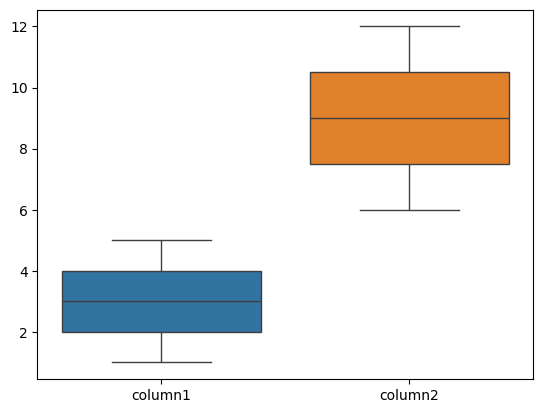

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two sample dataframes
df1 = pd.DataFrame({
    'column1': [1, 2, 3, 4, 5]
})

df2 = pd.DataFrame({
    'column2': [6, 7, 8, 9, 10, 11, 12]
})

# Combine the two dataframes into a single dataframe
df = pd.concat([df1, df2], axis=1)

# Create a boxplot with two columns
sns.boxplot(data=df)

# Add labels to the x-axis
plt.xticks([0, 1], ['column1', 'column2'])

# Show the plot
plt.show()


In [161]:
# Convert the 'date' column to datetime format
df['day'] = pd.to_datetime(df['day'])
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df['payer_country'] = df['payer'] + '_' + df['country']
# Margin (when tx !=0)
df['margin'] = df.apply(lambda row: row['gp'] / row['tx'] if row['tx'] != 0 else 0, axis=1)
df['margin'] = df['margin'].apply(lambda x: float(x)).round(4)

In [162]:
# DATA RANGE
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]